In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
def read_data(subjects):
    file_names = ["ECL1", "ECR", "WL1", "WR"]
    data = {} 

    for subject in subjects:
        data[subject] = {file: pd.read_csv(f'../data/S{subject}/{file}.csv') for file in file_names}
    
    return data

In [7]:
subjects = range(1, 11)
data_dict = read_data(subjects)

In [11]:
# S1
ecl1_1 = data_dict[1]["ECL1"]
ecr_1 = data_dict[1]["ECR"]
wl1_1 = data_dict[1]["WL1"]
wr_1 = data_dict[1]["WR"]

ecl1_1

,Time,Fz,Mx,My,CoPx,CoPy
0,0.000,733.748595,59.902715,-7.901447,0.010769,0.081639
1,0.001,733.746245,59.863235,-7.900846,0.010768,0.081586
2,0.002,733.841465,59.883125,-7.923207,0.010797,0.081602
3,0.003,733.938115,59.903495,-7.900557,0.010765,0.081619
4,0.004,733.657805,59.922565,-7.878016,0.010738,0.081676
...,...,...,...,...,...,...
59990,59.990,732.630365,61.301005,-8.189367,0.011178,0.083672
59991,59.991,732.723235,61.281415,-8.211127,0.011206,0.083635
59992,59.992,732.723235,61.281415,-8.211127,0.011206,0.083635
59993,59.993,732.723235,61.281415,-8.211127,0.011206,0.083635


In [12]:
def plot_cop(data, title):
    # Normalize COPx and COPy 
    cop_x = (data['CoPx'] - data['CoPx'].mean()) / data['CoPx'].std()  # Standardize to zero mean, unit variance
    cop_y = (data['CoPy'] - data['CoPy'].mean()) / data['CoPy'].std()

    # Plot COPx and COPy
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(data['Time'], cop_x, label="COPx (Lateral Sway)", color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized COPx")
    plt.legend()
    plt.title(title + ": Medial-Lateral Sway")

    plt.subplot(2, 1, 2)
    plt.plot(data['Time'], cop_y, label="COPy (Forward-Backward Sway)", color='g')
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized COPy")
    plt.legend()
    plt.title(title + ": Anterior-Posterior Sway")

    plt.tight_layout()
    plt.show()

def plot_m(data, title):
    # Normalize Mx and My 
    m_x = (data['Mx'] - data['Mx'].mean()) / data['Mx'].std()  # Standardize to zero mean, unit variance
    m_y = (data['My'] - data['My'].mean()) / data['My'].std()

    # Plot Mx and My
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(data['Time'], m_x, label="Mx (_____ Sway)", color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized Mx")
    plt.legend()
    plt.title(title + ": _______")

    plt.subplot(2, 1, 2)
    plt.plot(data['Time'], m_y, label="My (______ Sway)", color='g')
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized My")
    plt.legend()
    plt.title(title + ": ______")

    plt.tight_layout()
    plt.show()

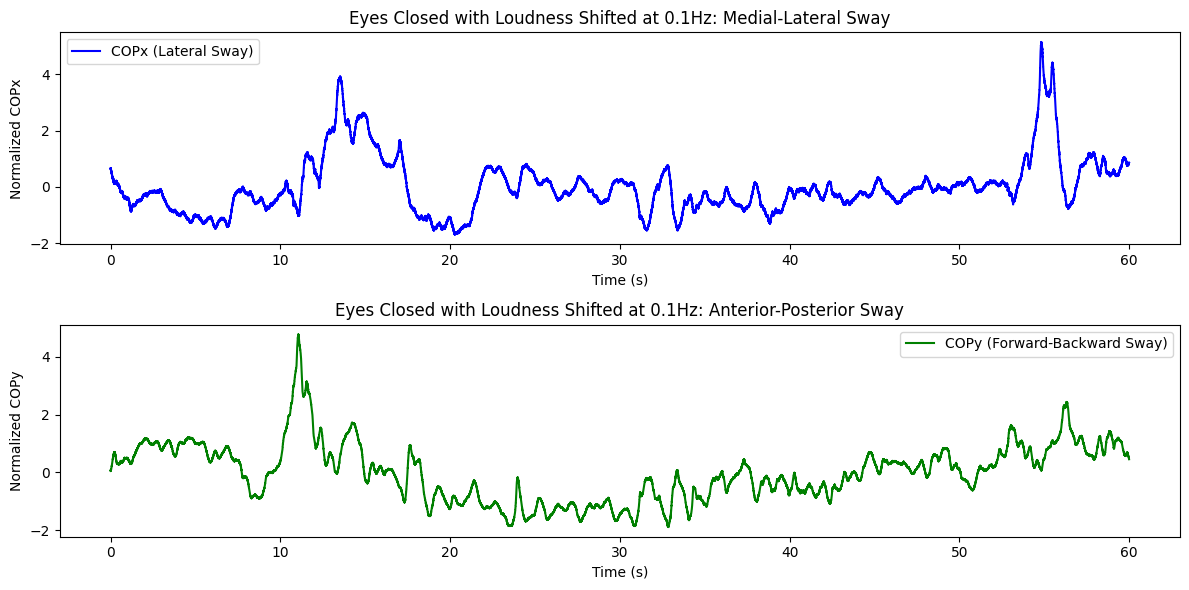

In [13]:
plot_cop(ecl1_1, "Eyes Closed with Loudness Shifted at 0.1Hz")

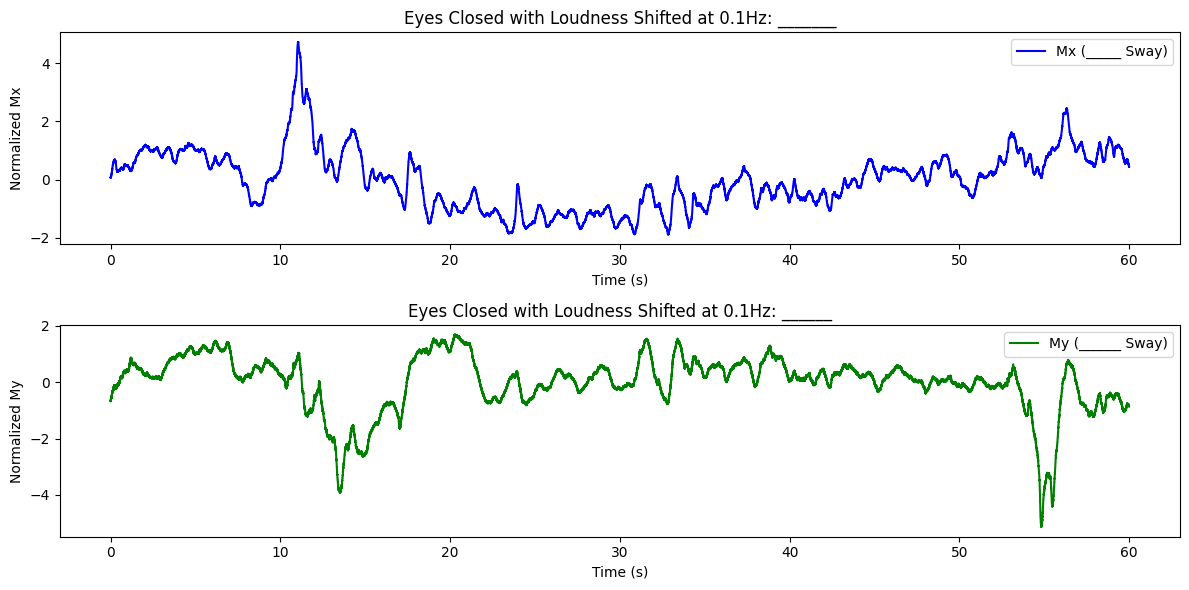

In [14]:
plot_m(ecl1_1, "Eyes Closed with Loudness Shifted at 0.1Hz")

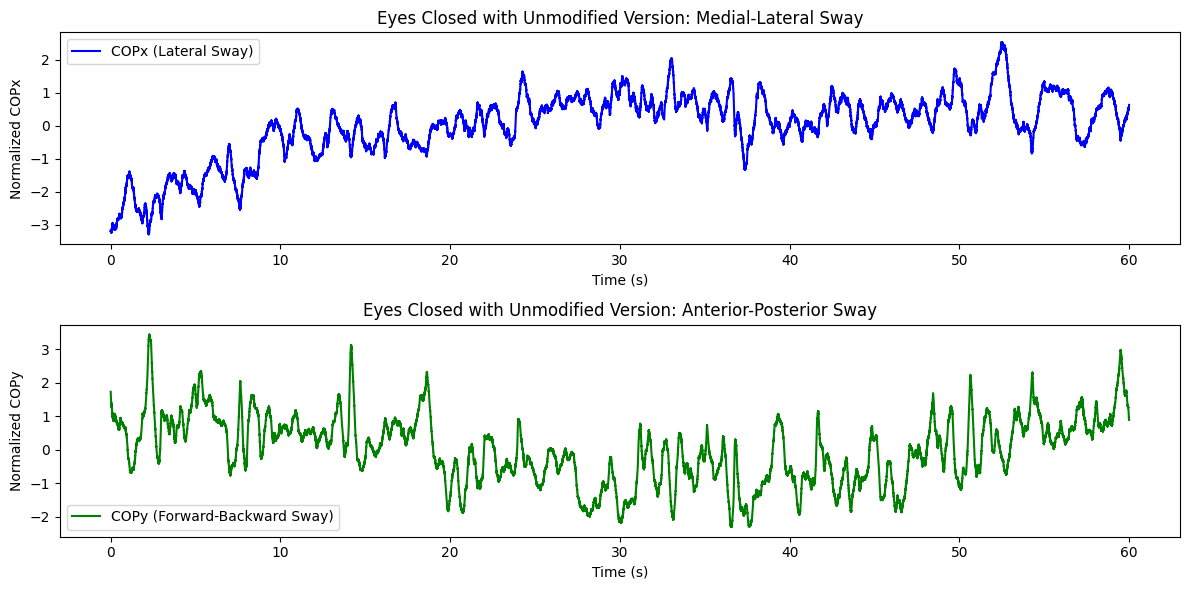

In [15]:
plot_cop(ecr_1, "Eyes Closed with Unmodified Version")

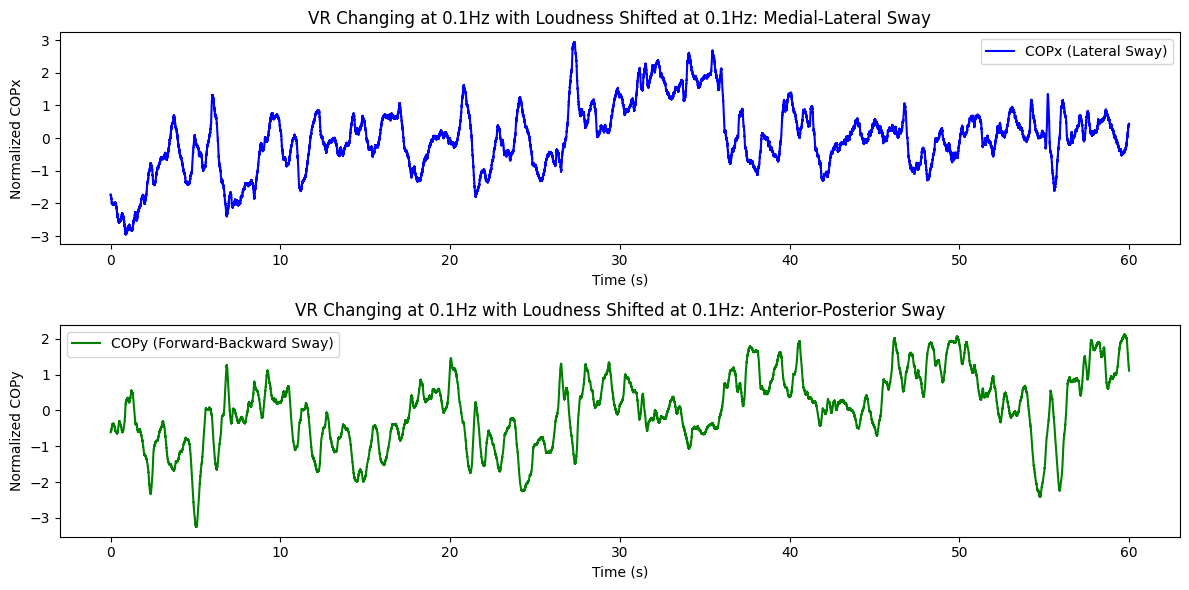

In [16]:
plot_cop(wl1_1, "VR Changing at 0.1Hz with Loudness Shifted at 0.1Hz")

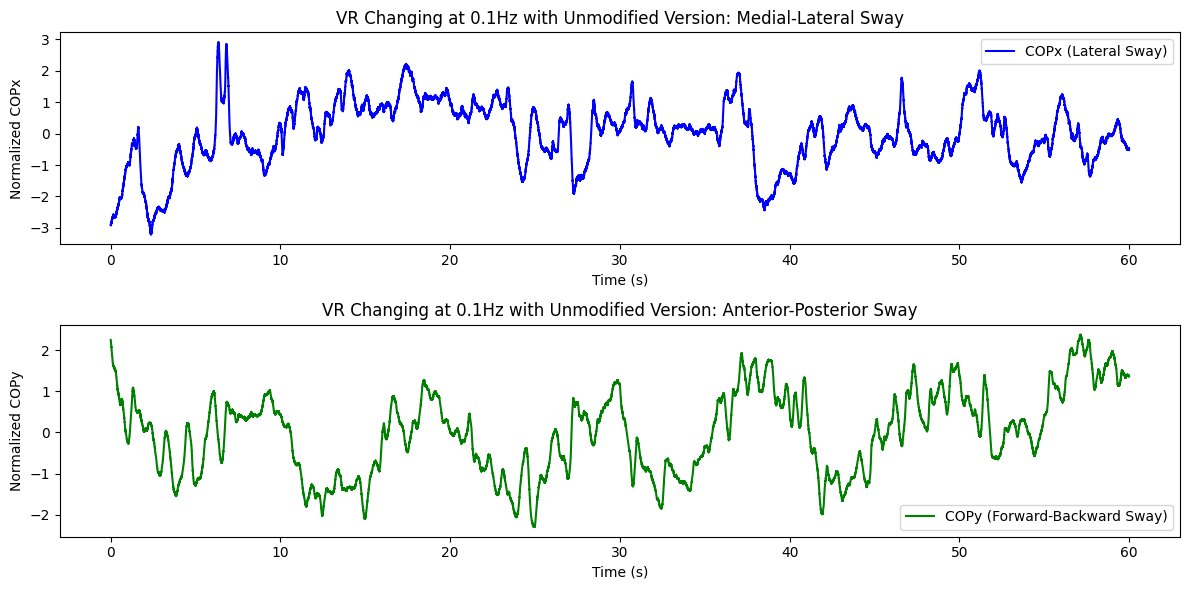

In [17]:
plot_cop(wr_1, "VR Changing at 0.1Hz with Unmodified Version")

In [8]:
ecr_1 = data_dict[1]["ECR"]
wl1_1 = data_dict[1]["WL1"]

In [10]:
def normalize(data):
    cop_y = (data['CoPy'] - data['CoPy'].mean()) / data['CoPy'].std()
    mx = (data['Mx'] - data['Mx'].mean()) / data['Mx'].std()  
    return cop_y, mx


In [14]:
ecr_1_copy = normalize(ecr_1)[0]
ecr_1_mx = normalize(ecr_1)[1]
wl1_1_copy = normalize(wl1_1)[0]
wl1_1_mx = normalize(wl1_1)[1]

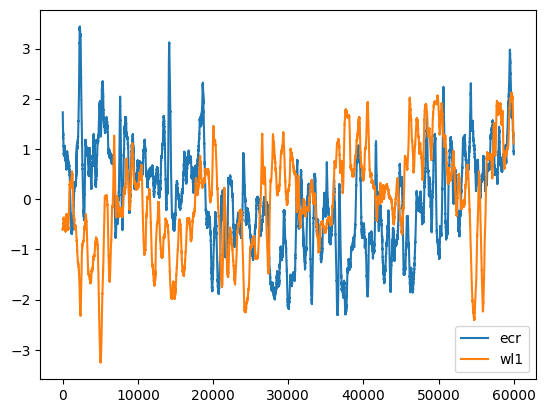

In [16]:
plt.plot(ecr_1_copy, label = "ecr")
plt.plot(wl1_1_copy, label = "wl1")
plt.legend()
plt.show()

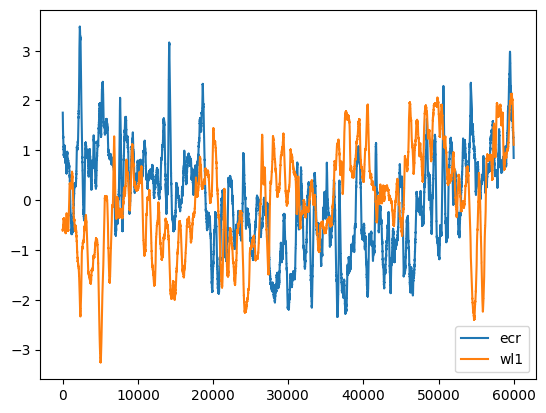

In [17]:
plt.plot(ecr_1_mx, label = "ecr")
plt.plot(wl1_1_mx, label = "wl1")
plt.legend()
plt.show()